# 課題3 データの前処理と可視化

* numpyを用いたデータの前処理  
欠損値の処理、外れ値の処理、標準化などの操作の基礎
  
* matplotlibを用いたデータの可視化  
ヒストグラムなどによる可視化、相関の表示など

### 必要なモジュールの読み込み

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Q1 欠損値の処理

欠損値を含む得点データのcsvファイル 'score_missing.csv' を読み込み作成したデータフレームを受け取り、各列の欠損値をその列の欠損がない要素の値の中央値で補完したデータフレームを返す`fill_median()`関数を完成させる。

In [18]:
score = pd.read_csv('ex3/score_missing.csv') # csvファイル読み込み

def fill_median(df):
    return df.fillna(df.median())
fill_median(score)

,kokugo,shakai,sugaku,rika
0,30.0,43.0,51,58.0
1,39.0,21.0,50,56.0
2,42.0,43.0,23,57.0
3,29.0,87.0,77,100.0
4,70.0,71.0,78,67.0
5,66.0,43.0,53,58.0
6,29.0,26.0,44,52.0
7,42.0,54.0,37,59.0
8,45.0,43.0,7,44.0
9,68.0,41.0,29,81.0


## Q2 外れ値の処理

### Q2-1 numpyでの外れ値の処理

以下では、csvファイルをnumpy配列の形として読み込む。

In [20]:
score = np.loadtxt("ex3/exam_score.csv", delimiter=",", skiprows=1)

以下の規則のもと外れ値を定義し、全ての外れ値を要素としてもつリストを返す。
- （第1四分位-1.5IQR）を値の下限としてそれより小さい値は外れ値とする
- （第3四分位+1.5IQR）を値の上限としてそれより大きい値は外れ値とする

In [21]:
def find_outliers(input_array):
    q1, q3 = np.percentile(input_array, [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return input_array[(input_array>upper) | (input_array < lower)]

In [22]:
find_outliers(np.array([30,39,-100,29,95,70,67,200,29,1000,56,45,68]))

array([-100,  200, 1000])

### Q2-2 pandasでの外れ値の処理

先ほどと同じ規則で外れ値を定義し、外れ値を含む行を除いたデータフレームを返す。

In [26]:
score = pd.read_csv('ex3/score_outlier.csv') # csvファイル読み込み
def drop_outliers(df):
    columns = df.columns # 列名のリスト
    for c in columns: # 各列ごとの処理      
        q1 = df[c].describe()['25%']
        q3 = df[c].describe()['75%']
        iqr =  q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        df = df.drop(df.loc[(df[c]>upper)|(df[c]<lower), :].index)
    return df 

In [28]:
# 外れ値を除いたデータフレームの行数
len(drop_outliers(score).index)

155

### Q2-3 箱ひげ図での可視化

各教科の点数を箱ひげ図で可視化する。

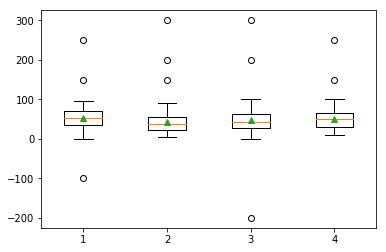

In [31]:
# csvファイルからNumPy配列の作成
score = np.loadtxt("ex3/score_outlier.csv",delimiter=",", skiprows=1)
plt.boxplot([score.T[0], score.T[1],score.T[2], score.T[3]], showmeans=True);

## Q3 標準化

### Q3-1 変数変換

NumPyの配列を受け取り、各教科の点数をその教科の平均値と分散を用いて標準化した配列を返すnormalize_score()関数を完成させる。

In [35]:
# csvファイルからNumPy配列の作成
score = np.loadtxt("ex3/exam_score.csv", delimiter=",", skiprows=1)
def normalize_score(a):
    return (a - np.mean(a))/(np.std(a))
normalize_score(score) # 関数呼び出して標準化された配列を表示

array([[-0.7421071 , -0.16984799,  0.18231146,  0.71055064],
       [-0.34592771, -1.13828648,  0.0942716 ,  0.40241112],
       [-0.78612703, -0.7421071 , -1.05024661,  0.44643105],
       [ 2.11918844,  1.76702899,  1.32682968,  2.3392881 ],
       [ 1.01869016,  1.06271009,  1.37084961,  0.88663036],
       [ 0.88663036,  0.27035133,  0.40241112,  0.62251078],
       [-0.78612703, -0.91818682, -0.12582806,  0.22633139],
       [ 0.40241112,  0.31437126, -0.43396758,  0.53447091],
       [-0.08180813, -1.13828648, -1.75456552, -0.12582806],
       [ 0.93065029, -0.25788785, -0.78612703,  1.5029094 ],
       [ 0.13829153, -0.16984799,  1.45888947,  1.15074995],
       [ 1.01869016,  0.62251078,  0.62251078,  1.06271009],
       [-0.03778819, -0.43396758, -0.47798751,  0.40241112],
       [-1.05024661, -1.00622668, -1.18230641, -0.47798751],
       [ 1.32682968,  0.31437126,  0.49045098,  1.6349692 ],
       [-1.40240606, -1.71054558, -1.09426655, -0.78612703],
       [-0.43396758, -1.

In [36]:
normalize_score(score).sum()

1.4210854715202004e-14

### Q3-2 ヒストグラム

数学の点数をヒストグラムとして可視化する。

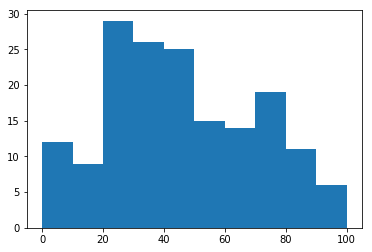

In [39]:
# csvファイルからNumPy配列の作成
score = np.loadtxt("ex3/exam_score.csv", delimiter=",", skiprows=1)
plt.hist(score.T[2]);

## Q4 相関

### Q4-1 相関係数の計算

整数を要素とする同じ長さの2つの1次元配列を入力として受け取り、それらの配列の要素の相関係数を返すcorrelation()関数を完成させる。numpyのcorrcoef関数を使うと、分散共分散行列が返って来るため、[0,1]　要素を指定してやる必要がある。

In [40]:
def correlation(x, y):
    corr = np.corrcoef(x,y)[0,1]
    if corr == 0.9999999999999999:
        return 1
    elif corr == -0.9999999999999999:
        return -1
    else:
        return corr  

In [41]:
correlation(np.array([-1,1]),np.array([ -1, 1]))

1

In [43]:
correlation(np.array([-1,1]),np.array([ 1, -1]))

-1

In [49]:
correlation(np.array([-1,1]),np.array([ 2,3]))

1

### Q4.2  散布図の可視化

以下のような形式の"exam_score.csv"ファイルを読み込み、数学と理科の点数の関係を散布図として可視化する。

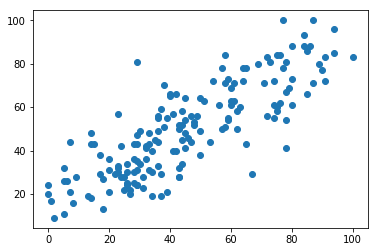

In [52]:
# csvファイルからNumPy配列の作成
score = np.loadtxt("ex3/exam_score.csv", delimiter=",", skiprows=1)
plt.plot(score.T[2], score.T[3] , 'o');

### Q4-3 相関行列の可視化

pandasのcorrメソッドを使うとデータフレームの列間の相関係数を簡単に求められる。

In [56]:
score = pd.read_csv("ex3/exam_score.csv", sep=",")
score.corr(method='pearson')

,kokugo,shakai,sugaku,rika
kokugo,1.000000,0.782622,0.718526,0.717996
shakai,0.782622,1.000000,0.778242,0.834075
sugaku,0.718526,0.778242,1.000000,0.817947
rika,0.717996,0.834075,0.817947,1.000000


ヒートマップとして可視化する。

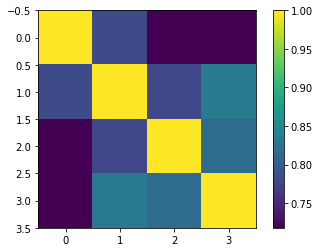

In [57]:
plt.colorbar(plt.imshow(score.corr(method='pearson')));